In [1]:
import pandas as pd
data = pd.read_csv("final_preprocessed_data.csv")
data

,fox headline mentions (log),nyt lead paragraph mentions (log),nyt headline mentions (log),percent total population two or more races white and american indian and alaska native,"percent citizen, voting age population citizen, 18 and over population female","percent citizen, voting age population citizen, 18 and over population male",percent hispanic or latino and total population not hispanic or latino black or african american alone,estimate total population one race asian asian indian (log),percent race alone or in combination with one or more other races total population black or african american,percent total population one race black or african american,...,estimate total population 35 to 44 years,estimate total population (log),estimate total population 16 years and over (log),estimate total population 18 years and over female (log),estimate total population 21 years and over (log),estimate hispanic or latino and total population (log),estimate race alone or in combination with one or more other races total population (log),total_media_mentions (log),citizenship_female_minus_male,won_county
0,0.000000,0.000000,0.000000,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,0.000000,-25.8,0
1,7.167038,7.686162,7.153834,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,22.007034,-25.8,0
2,1.098612,0.000000,0.000000,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,1.098612,-25.8,0
3,0.000000,1.609438,1.098612,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,2.708050,-25.8,0
4,7.872074,8.471359,8.243283,0.5,37.1,62.9,20.6,3.295837,22.2,20.9,...,9611.0,10.966783,10.781079,9.750103,10.717391,10.966783,10.966783,24.586715,-25.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884746,7.167038,7.686162,7.153834,2.9,49.6,50.4,3.3,5.480639,5.9,3.4,...,9901.0,11.258356,10.969284,10.235198,10.887250,11.258356,11.258356,22.007034,-0.8,0
884747,0.000000,1.609438,1.098612,2.9,49.6,50.4,3.3,5.480639,5.9,3.4,...,9901.0,11.258356,10.969284,10.235198,10.887250,11.258356,11.258356,2.708050,-0.8,0
884748,1.098612,0.000000,0.000000,2.9,49.6,50.4,3.3,5.480639,5.9,3.4,...,9901.0,11.258356,10.969284,10.235198,10.887250,11.258356,11.258356,1.098612,-0.8,0
884749,0.000000,0.000000,0.000000,2.9,49.6,50.4,3.3,5.480639,5.9,3.4,...,9901.0,11.258356,10.969284,10.235198,10.887250,11.258356,11.258356,0.000000,-0.8,0


In [2]:
column_list = list(data.columns)

for column in column_list:
    print(column)

fox headline mentions (log)
nyt lead paragraph mentions (log)
nyt headline mentions (log)
percent total population two or more races white and american indian and alaska native
percent citizen, voting age population citizen, 18 and over population female
percent citizen, voting age population citizen, 18 and over population male
percent hispanic or latino and total population not hispanic or latino black or african american alone
estimate total population one race asian asian indian (log)
percent race alone or in combination with one or more other races total population black or african american
percent total population one race black or african american
percent total population one race asian asian indian
estimate hispanic or latino and total population not hispanic or latino black or african american alone (log)
estimate race alone or in combination with one or more other races total population black or african american (log)
estimate hispanic or latino and total population hispanic 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [4]:
column = ['won_county']
X = data.drop(columns=column)  
y = data['won_county']  # Target variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt = DecisionTreeClassifier(random_state=1)


dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.08
R^2 Score: 0.68



Feature Importances:
nyt headline mentions (log): 0.1954847234449366
percent total population two or more races white and american indian and alaska native: 0.09661802769236075
percent citizen, voting age population citizen, 18 and over population male: 0.07485730631317371
percent total population one race asian asian indian: 0.0667504212527691
estimate hispanic or latino and total population hispanic or latino (of any race) cuban: 0.05163192939134377
percent race alone or in combination with one or more other races total population native hawaiian and other pacific islander: 0.051003400025675605
estimate total population one race american indian and alaska native chippewa tribal grouping: 0.04569817158052465
percent race alone or in combination with one or more other races total population black or african american: 0.03689111423958006
estimate hispanic or latino and total population not hispanic or latino black or african american alone (log): 0.03516593043929427
percent hispanic or

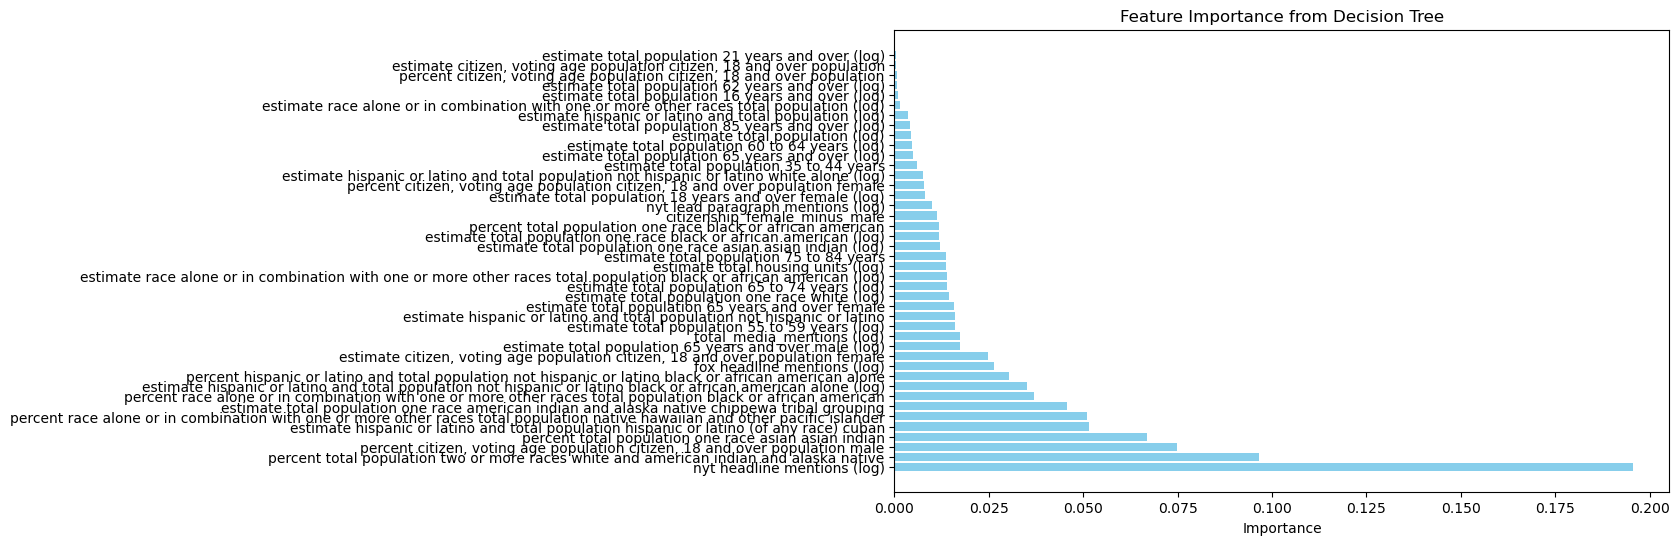

In [6]:

importance = dt.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)


print("\nFeature Importances:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")




plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree')
plt.show()


Mean Squared Error: 0.08
R^2 Score: 0.68

Feature Importances:
fox headline mentions (log): 0.09284713387212942
total_media_mentions (log): 0.08833117664538355
nyt lead paragraph mentions (log): 0.07640003366501098
nyt headline mentions (log): 0.06843321606328416
percent total population two or more races white and american indian and alaska native: 0.03486788731335568
percent citizen, voting age population citizen, 18 and over population male: 0.031160661383987966
percent citizen, voting age population citizen, 18 and over population female: 0.030736506958112125
percent total population one race asian asian indian: 0.028592893047237656
estimate hispanic or latino and total population not hispanic or latino black or african american alone (log): 0.026975456022007304
citizenship_female_minus_male: 0.02544688305774307
estimate total population one race asian asian indian (log): 0.02513507272603662
estimate race alone or in combination with one or more other races total population black o

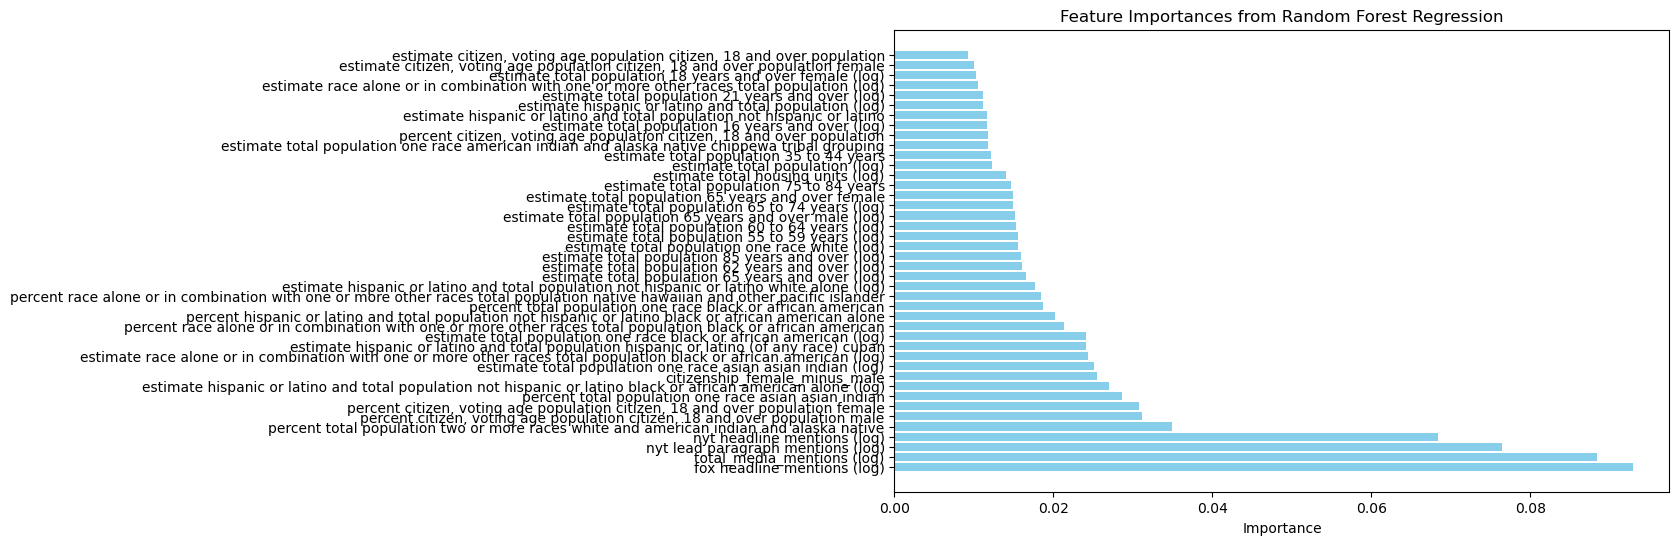

In [7]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score



model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  


print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print("\nFeature Importances:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Regression')
plt.show()


Mean Squared Error: 0.16
R^2 Score: 0.35

Feature Importances:
fox headline mentions (log): 0.09284713387212942
total_media_mentions (log): 0.08833117664538355
nyt lead paragraph mentions (log): 0.07640003366501098
nyt headline mentions (log): 0.06843321606328416
percent total population two or more races white and american indian and alaska native: 0.03486788731335568
percent citizen, voting age population citizen, 18 and over population male: 0.031160661383987966
percent citizen, voting age population citizen, 18 and over population female: 0.030736506958112125
percent total population one race asian asian indian: 0.028592893047237656
estimate hispanic or latino and total population not hispanic or latino black or african american alone (log): 0.026975456022007304
citizenship_female_minus_male: 0.02544688305774307
estimate total population one race asian asian indian (log): 0.02513507272603662
estimate race alone or in combination with one or more other races total population black o

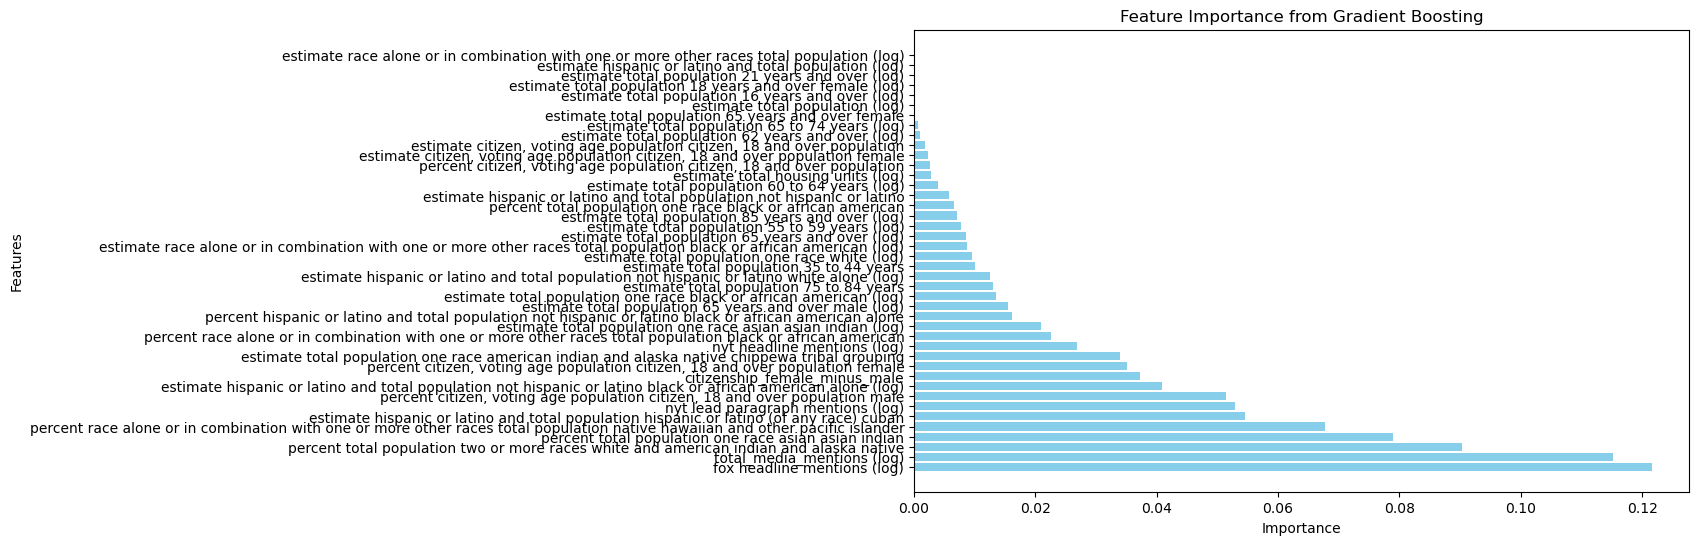

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error



model2 = GradientBoostingClassifier(n_estimators=100, random_state=42)


model2.fit(X_train, y_train)


y_pred = model2.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


importances = model2.feature_importances_


feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)


print("\nFeature Importances:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")


plt.figure(figsize=(10, 6))
plt.title("Feature Importance from Gradient Boosting")
plt.barh(feature_importances.index, feature_importances["Importance"], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[79055, 33662],
       [48645, 59826]])

Text(0.5, 427.9555555555555, 'Predicted label')

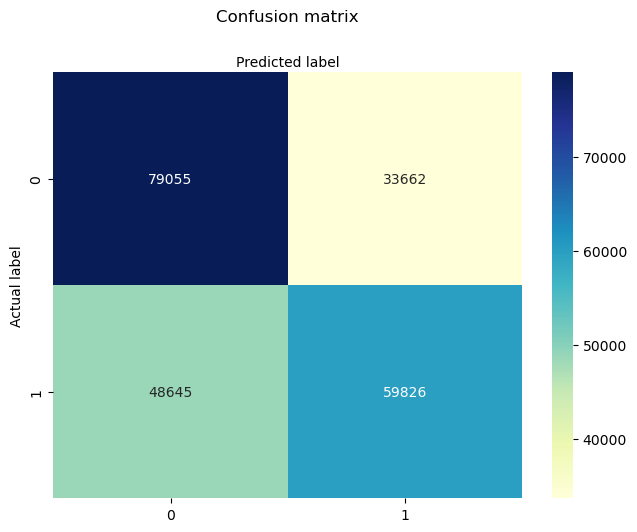

In [10]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [11]:
y_pred = logreg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')





Mean Squared Error: 0.37
R^2 Score: -0.49


In [12]:

import numpy as np
importance = logreg.coef_[0]  # For binary classification
import pandas as pd

feature_names = X.columns  
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', key=np.abs, ascending=False)



Feature Importances:
fox headline mentions (log): 0.09284713387212942
total_media_mentions (log): 0.08833117664538355
nyt lead paragraph mentions (log): 0.07640003366501098
nyt headline mentions (log): 0.06843321606328416
percent total population two or more races white and american indian and alaska native: 0.03486788731335568
percent citizen, voting age population citizen, 18 and over population male: 0.031160661383987966
percent citizen, voting age population citizen, 18 and over population female: 0.030736506958112125
percent total population one race asian asian indian: 0.028592893047237656
estimate hispanic or latino and total population not hispanic or latino black or african american alone (log): 0.026975456022007304
citizenship_female_minus_male: 0.02544688305774307
estimate total population one race asian asian indian (log): 0.02513507272603662
estimate race alone or in combination with one or more other races total population black or african american (log): 0.0243826315468

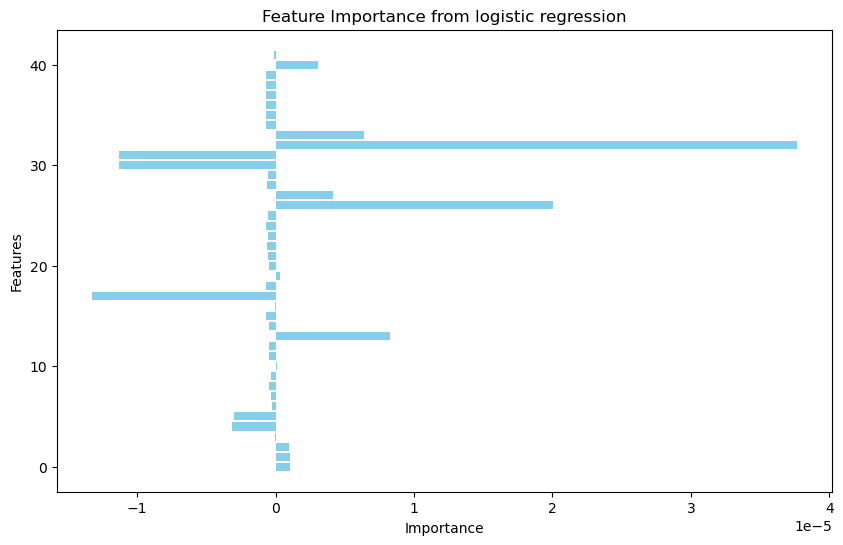

In [13]:
print("\nFeature Importances:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")


plt.figure(figsize=(10, 6))
plt.title("Feature Importance from logistic regression")
plt.barh(importance_df.index, importance_df["Importance"], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()